# Data Extraction

In [ ]:
import pandas as pd
import copy
import ast
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.impute import KNNImputer
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
from scipy.stats import pointbiserialr, spearmanr, kendalltau, chi2_contingency
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/car_details12.csv'
file_path2 = '/content/drive/MyDrive/car_details.csv'
path = '/content/car_details.csv'
df1 = pd.read_csv(file_path1,error_bad_lines=False)
df2 = pd.read_csv(file_path2,error_bad_lines=False)
df23 = pd.concat([df1, df2], axis=0)
result_df = df23.drop_duplicates(keep='last')
df_cars = copy.deepcopy(result_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-141-006e9b381fd2>:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



<ipython-input-141-006e9b381fd2>:6: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





In [ ]:
df23

,Unnamed: 0,Title,Price,URL,Description,Condition,Kilometers,Body Details,Performance Details,Extra Details
0,0,2023 Chrysler Pacifica Hybrid Limited Safety S...,"$64,888",https://www.kijiji.ca/v-cars-trucks/city-of-to...,This 2023 Chrysler Pacifica Hybrid Limited is ...,Used,44,"{'Year:': '2023', 'Make:': 'Chrysler', 'Model:...","{'Drivetrain:': 'Front-wheel drive (FWD)', 'Tr...","{'Sunroof': 1, 'Navigation system': 1, 'Blueto..."
1,1,2020 Nissan Rogue SV,"$32,995",https://www.kijiji.ca/v-cars-trucks/guelph/202...,2020 Nissan Rogue 2.5L 4-Cylinder DOHC 16V AWD...,Used,"80,101","{'Year:': '2020', 'Make:': 'Nissan', 'Model:':...","{'Drivetrain:': 'All-wheel drive (AWD)', 'Tran...","{'Alloy wheels': 1, 'Bluetooth': 1, 'Push butt..."
2,2,Suzuki Jimny Kansai Third Gen (JB23) 4WD Turbo...,"$6,900",https://www.kijiji.ca/v-cars-trucks/grande-pra...,For sale is a very capable little off-roader f...,Used,"106,993","{'Year:': '1999', 'Make:': 'Suzuki', 'Model:':...","{'Drivetrain:': '4 x 4', 'Transmission:': 'Aut...","{'Alloy wheels': 1, 'Navigation system': 1, 'A..."
3,3,2022 Honda CR-V Touring,"$43,995",https://www.kijiji.ca/v-cars-trucks/hamilton/2...,"Automatic,4 Door,Power Driver Seats,Power Sunr...",Used,"14,115","{'Year:': '2022', 'Make:': 'Honda', 'Model:': ...","{'Drivetrain:': 'All-wheel drive (AWD)', 'Tran...","{'Sunroof': 1, 'Alloy wheels': 1, 'Navigation ..."
4,4,2022 Ford Explorer XLT - Moonroof | Navigation |,"$49,335",https://www.kijiji.ca/v-cars-trucks/windsor-ar...,- ACCIDENT FREE- LEATHER SEATS- HEATED SEATS- ...,Used,"20,795","{'Year:': '2022', 'Make:': 'Ford', 'Model:': '...","{'Drivetrain:': '4 x 4', 'Transmission:': 'Aut...","{'Sunroof': 1, 'Bluetooth': 1, 'Push button st..."
...,...,...,...,...,...,...,...,...,...,...
6774,6774,2021 BMW X5 XDrive40i XDrive40i | Premium Enha...,"$65,929",https://www.kijiji.ca/v-autos-camions/longueui...,----ENSEMBLE/ PACKAGE: Premium Enhanced-Suspen...,Used,"63,000","{'Year:': '2021', 'Make:': 'BMW', 'Model:': 'X...","{'Drivetrain:': 'All-wheel drive (AWD)', 'Tran...","{'Sunroof': 1, 'Alloy wheels': 1, 'Navigation ..."
6775,6775,2023 Cadillac Escalade 4WD Premium Luxury,"$136,951",https://www.kijiji.ca/v-cars-trucks/winnipeg/2...,ENGINE 6.2L V8 WITH DYNAMIC FUEL MANAGEMENT ...,New,NaN,"{'Year:': '2023', 'Make:': 'Cadillac', 'Model:...","{'Drivetrain:': '4 x 4', 'Transmission:': 'Aut...","{'Sunroof': 1, 'Navigation system': 1, 'Blueto..."
6776,6776,2017 Lexus RC 2dr Cpe,"$40,888",https://www.kijiji.ca/v-cars-trucks/calgary/20...,Thanks for viewing our House Of Cars Deerfoot ...,Used,"44,688","{'Year:': '2017', 'Make:': 'Lexus', 'Model:': ...","{'Drivetrain:': 'All-wheel drive (AWD)', 'Tran...","{'Sunroof': 1, 'Alloy wheels': 1, 'Bluetooth': 1}"
6777,6777,2014 Toyota Venza LIMITED AWD - TOIT OUVRANT -...,"$21,984",https://www.kijiji.ca/v-autos-camions/ville-de...,Magnifique Venza Limited muni de sièges chauff...,Used,"109,429","{'Year:': '2014', 'Make:': 'Toyota', 'Model:':...","{'Drivetrain:': 'All-wheel drive (AWD)', 'Tran...","{'Sunroof': 1, 'Alloy wheels': 1, 'Navigation ..."


In [ ]:
df_cars.describe()

,Unnamed: 0
count,10718.000000
mean,2867.132114
std,1834.764397
min,0.000000
25%,1339.250000
50%,2679.000000
75%,4098.750000
max,6778.000000


# Data Pre-processing and Insight

In [ ]:
df_cars.columns
df_cars.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df_cars = df_cars.reset_index(drop=True)

In [ ]:
def safe_eval(string):
    if not isinstance(string, str):
        string = str(string)
    try:
        return ast.literal_eval(string.replace('""', '"'))
    except (ValueError, SyntaxError):
        return {}

df_cars['Body Details'] = df_cars['Body Details'].apply(safe_eval)
df_cars['Performance Details'] = df_cars['Performance Details'].apply(safe_eval)
df_cars['Extra Details'] = df_cars['Extra Details'].apply(safe_eval)


df_body_details = pd.json_normalize(df_cars['Body Details'])
df_performance_details = pd.json_normalize(df_cars['Performance Details'])
df_extra_details = pd.json_normalize(df_cars['Extra Details'])

df_cars = pd.concat([df_cars, df_body_details, df_performance_details, df_extra_details], axis=1)
df_cars.drop(columns=['Body Details', 'Performance Details', 'Extra Details'], inplace=True)
df_cars.head()

,Title,Price,URL,Description,Condition,Kilometers,Year:,Make:,Model:,Trim:,...,Cruise control,Trailer hitch,Jantes en alliage,Système de navigation,Démarrage à bouton-poussoir,Régulateur de vitesse,Attache-remorque,Air conditionné,Toit ouvrant,Aide au stationnement
0,2023 Chrysler Pacifica Hybrid Limited Safety S...,"$64,888",https://www.kijiji.ca/v-cars-trucks/city-of-to...,This 2023 Chrysler Pacifica Hybrid Limited is ...,Used,44,2023,Chrysler,Pacifica,Limited Safety Sphere S Appearance Pano Roof,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Nissan Rogue SV,"$32,995",https://www.kijiji.ca/v-cars-trucks/guelph/202...,2020 Nissan Rogue 2.5L 4-Cylinder DOHC 16V AWD...,Used,"80,101",2020,Nissan,Rogue,SV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Suzuki Jimny Kansai Third Gen (JB23) 4WD Turbo...,"$6,900",https://www.kijiji.ca/v-cars-trucks/grande-pra...,For sale is a very capable little off-roader f...,Used,"106,993",1999,Suzuki,Other,Kansai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022 Honda CR-V Touring,"$43,995",https://www.kijiji.ca/v-cars-trucks/hamilton/2...,"Automatic,4 Door,Power Driver Seats,Power Sunr...",Used,"14,115",2022,Honda,CR-V,Touring,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022 Ford Explorer XLT - Moonroof | Navigation |,"$49,335",https://www.kijiji.ca/v-cars-trucks/windsor-ar...,- ACCIDENT FREE- LEATHER SEATS- HEATED SEATS- ...,Used,"20,795",2022,Ford,Explorer,XLT - Moonroof | Navigation |,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# def preprocess_text(text):
#     if isinstance(text, str):
#         # Convert text to lowercase
#         text = text.lower()

#         # Remove special characters and numbers using regex
#         text = re.sub(r'[^a-zA-Z]', ' ', text)
#         text = re.sub(r'\d+','',text)

#         # Remove punctuation using string.punctuation
#         text = ''.join([char for char in text if char not in string.punctuation])


#         words = word_tokenize(text)


#         stop_words = set(stopwords.words('english'))
#         words = [word for word in words if word not in stop_words]

#         stemmer = PorterStemmer()
#         words = [stemmer.stem(word) for word in words]

#         cleaned_text = ' '.join(words)

#         return cleaned_text
#     else:
#         return ''

# df_cars['Description'] = df_cars['Description'].apply(preprocess_text)
# df_cars['Trim:']=df_cars['Trim:'].apply(preprocess_text)

In [ ]:
def extract_city_name(url):
    url_parts = url.split('/')
    return url_parts[4]
df_cars['city'] = df_cars['URL'].apply(extract_city_name)

In [ ]:
descriptions = df["Description"]

In [ ]:
df_cars.isnull().sum()

Title                              0
Price                            570
URL                                0
Description                      250
Condition                          0
Kilometers                      2646
Year:                             87
Make:                             87
Model:                            98
Trim:                            471
Colour:                          307
Body Type:                        87
Drivetrain:                      315
Transmission:                    754
Fuel Type:                       288
Boite de vitesse:              10673
Type de carburant:             10683
Sunroof                         7772
Navigation system               7916
Bluetooth                       3293
Push button start               5404
Parking assistant               7309
Alloy wheels                    7281
Air conditioning               10595
Cruise control                 10605
Trailer hitch                  10663
Jantes en alliage              10694
S

In [ ]:
df_cars.columns

Index(['Title', 'Price', 'URL', 'Description', 'Condition', 'Kilometers',
       'Year:', 'Make:', 'Model:', 'Trim:', 'Colour:', 'Body Type:',
       'Drivetrain:', 'Transmission:', 'Fuel Type:', 'Boite de vitesse:',
       'Type de carburant:', 'Sunroof', 'Navigation system', 'Bluetooth',
       'Push button start', 'Parking assistant', 'Alloy wheels',
       'Air conditioning', 'Cruise control', 'Trailer hitch',
       'Jantes en alliage', 'Système de navigation',
       'Démarrage à bouton-poussoir', 'Régulateur de vitesse',
       'Attache-remorque', 'Air conditionné', 'Toit ouvrant',
       'Aide au stationnement', 'city'],
      dtype='object')

In [ ]:
df_cars.drop(['URL','Boite de vitesse:','Trailer hitch','Attache-remorque','Aide au stationnement',
              'Cruise control','Sunroof',
              'Parking assistant','Title','Bluetooth','Air conditioning','Système de navigation','Push button start','Jantes en alliage','Air conditionné','Régulateur de vitesse','Démarrage à bouton-poussoir','Toit ouvrant','Alloy wheels','Navigation system','Type de carburant:','Description','Trim:'],axis=1,inplace=True)

In [ ]:
df_cars.describe()

,Price,Condition,Kilometers,Year:,Make:,Model:,Colour:,Body Type:,Drivetrain:,Transmission:,Fuel Type:,city
count,10148,10718,8072,10631,10631,10620,10411,10631,10403,9964,10430,10718
unique,2797,6,3376,42,47,383,16,9,5,8,5,119
top,"$37,995",Used,1,2023,Ford,1500,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,calgary
freq,61,8061,32,2473,1463,641,2582,4500,3501,9569,7563,951


In [ ]:
df_cars = df_cars.rename(columns={'Year:': 'year', 'Make:': 'make','Model:': 'model',
                                  'Colour:': 'colour','Body Type:': 'body_type',
                                  'Drivetrain:': 'drive_train','Fuel Type:': 'fuel_type',
                                  'Transmission:': 'transmission','Price':'price',
                                  'Condition':'condition','Kilometers':'kilometers'})

In [ ]:
df_cars

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,"$64,888",Used,44,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,"$32,995",Used,"80,101",2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
2,"$6,900",Used,"106,993",1999,Suzuki,Other,Green,Coupe (2 door),4 x 4,Automatic,Gasoline,grande-prairie
3,"$43,995",Used,"14,115",2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,"$49,335",Used,"20,795",2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,"$65,929",Used,"63,000",2021,BMW,X5,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,longueuil-rive-sud
10714,"$136,951",New,NaN,2023,Cadillac,Escalade,White,"SUV, Crossover",4 x 4,Automatic,Gasoline,winnipeg
10715,"$40,888",Used,"44,688",2017,Lexus,Other,Silver,Coupe (2 door),All-wheel drive (AWD),Automatic,Gasoline,calgary
10716,"$21,984",Used,"109,429",2014,Toyota,Venza,Other,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,ville-de-quebec


In [ ]:
df_cars['kilometers'] = pd.to_numeric(df_cars['kilometers'].astype(str).str.replace(',', ''), errors='coerce')
df_cars['price'] = pd.to_numeric(df_cars['price'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
df_origin = copy.deepcopy(df_cars)
df = copy.deepcopy(df_cars)

## Start Fresh

In [ ]:
df_cars=copy.deepcopy(df)

In [ ]:
df_cars

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,Used,44.0,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.0,Used,80101.0,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
2,6900.0,Used,106993.0,1999,Suzuki,Other,Green,Coupe (2 door),4 x 4,Automatic,Gasoline,grande-prairie
3,43995.0,Used,14115.0,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.0,Used,20795.0,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,65929.0,Used,63000.0,2021,BMW,X5,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,longueuil-rive-sud
10714,136951.0,New,NaN,2023,Cadillac,Escalade,White,"SUV, Crossover",4 x 4,Automatic,Gasoline,winnipeg
10715,40888.0,Used,44688.0,2017,Lexus,Other,Silver,Coupe (2 door),All-wheel drive (AWD),Automatic,Gasoline,calgary
10716,21984.0,Used,109429.0,2014,Toyota,Venza,Other,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,ville-de-quebec


In [ ]:
df_cars.isnull().sum()

price            654
condition          0
kilometers      2646
year              87
make              87
model             98
colour           307
body_type         87
drive_train      315
transmission     754
fuel_type        288
city               0
dtype: int64

Check number of 0 transmissions so deleted all of them


filled categorical with other for proper naming


In [ ]:
df_cars["make"].fillna("Other",inplace=True)
df_cars["model"].fillna("Other",inplace=True)
df_cars["colour"].fillna("Other",inplace=True)
df_cars["body_type"].fillna("Other",inplace=True)
df_cars["drive_train"].fillna("Other",inplace=True)
df_cars["transmission"].fillna("Other",inplace=True)
df_cars["fuel_type"].fillna("Other",inplace=True)

In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         10064 non-null  float64
 1   condition     10718 non-null  object 
 2   kilometers    8072 non-null   float64
 3   year          10631 non-null  object 
 4   make          10718 non-null  object 
 5   model         10718 non-null  object 
 6   colour        10718 non-null  object 
 7   body_type     10718 non-null  object 
 8   drive_train   10718 non-null  object 
 9   transmission  10718 non-null  object 
 10  fuel_type     10718 non-null  object 
 11  city          10718 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1004.9+ KB


In [ ]:
df_cars

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,Used,44.0,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.0,Used,80101.0,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
2,6900.0,Used,106993.0,1999,Suzuki,Other,Green,Coupe (2 door),4 x 4,Automatic,Gasoline,grande-prairie
3,43995.0,Used,14115.0,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.0,Used,20795.0,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,65929.0,Used,63000.0,2021,BMW,X5,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,longueuil-rive-sud
10714,136951.0,New,NaN,2023,Cadillac,Escalade,White,"SUV, Crossover",4 x 4,Automatic,Gasoline,winnipeg
10715,40888.0,Used,44688.0,2017,Lexus,Other,Silver,Coupe (2 door),All-wheel drive (AWD),Automatic,Gasoline,calgary
10716,21984.0,Used,109429.0,2014,Toyota,Venza,Other,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,ville-de-quebec


In [ ]:
df_cars.isnull().sum()

price            654
condition          0
kilometers      2646
year              87
make               0
model              0
colour             0
body_type          0
drive_train        0
transmission       0
fuel_type          0
city               0
dtype: int64

In [ ]:
# columns_to_impute = ['kilometers', 'price']
# imputer = KNNImputer(n_neighbors=5)
# df_cars[columns_to_impute] = imputer.fit_transform(df_cars[columns_to_impute])
# df_cars[["year"]] = imputer.fit_transform(df_cars[["year"]]).round().astype(int)

In [ ]:
# Distribution of target variable
fig = px.histogram(df_cars, x='price', nbins=30, title='Distribution of Car Prices',
                   labels={'price': 'Price', 'count': 'Count'})
fig.update_layout(xaxis_title='Price', yaxis_title='Count')
fig.show()

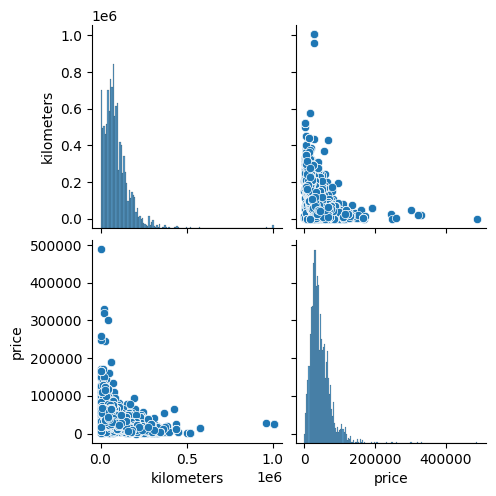

In [ ]:
numeric_cols = ['year', 'kilometers', 'price']
sns.pairplot(df_cars[numeric_cols])
plt.show()

In [ ]:
pd.concat([df_cars.head(10),df_cars.tail(10)])

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,Used,44.0,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.0,Used,80101.0,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
2,6900.0,Used,106993.0,1999,Suzuki,Other,Green,Coupe (2 door),4 x 4,Automatic,Gasoline,grande-prairie
3,43995.0,Used,14115.0,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.0,Used,20795.0,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
5,50587.0,Used,98584.0,2013,GMC,Sierra 3500,Grey,Pickup Truck,4 x 4,Automatic,Diesel,cowichan-valley-duncan
6,NaN,New,NaN,2023,Dodge,Charger,Blue,Sedan,Rear-wheel drive (RWD),Automatic,Gasoline,st-albert
7,9995.0,Used,115783.0,2012,Kia,Optima,Red,Sedan,Other,Automatic,Other,laval-rive-nord
8,74480.0,New,NaN,2024,Chevrolet,Silverado 3500HD,White,Other,4 x 4,Automatic,Gasoline,edmonton
9,76162.0,New,NaN,2023,Ram,1500,White,Pickup Truck,4 x 4,Automatic,Gasoline,edmonton


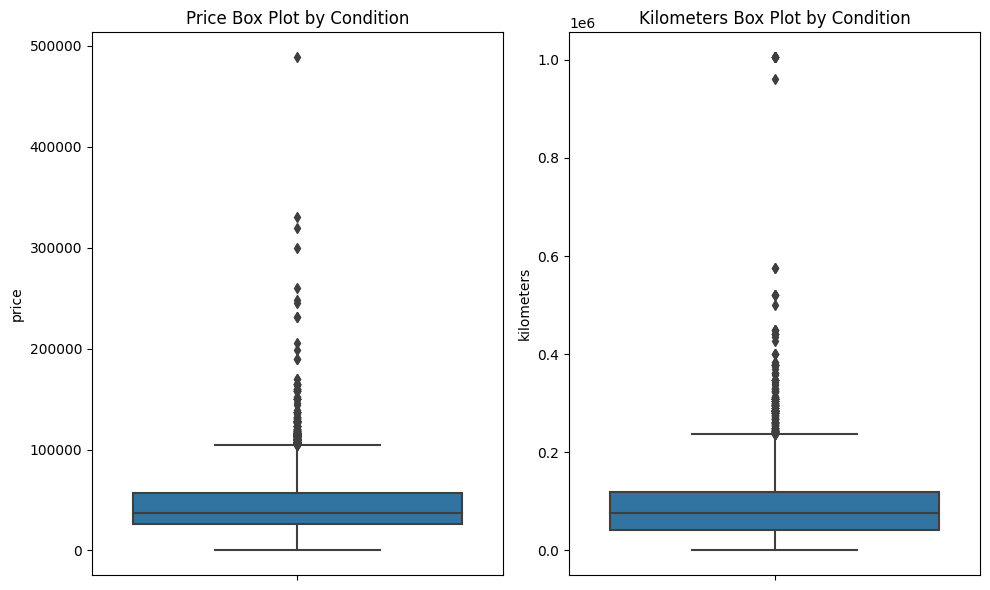

In [ ]:
# Create box plots using Seaborn
plt.figure(figsize=(10, 6))

# Price Box Plot
plt.subplot(1, 2, 1)
sns.boxplot( y="price", data=df_cars)
plt.title("Price Box Plot by Condition")

# Kilometers Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y="kilometers", data=df_cars)
plt.title("Kilometers Box Plot by Condition")

plt.tight_layout()
plt.show()

Number of outliers: 352
Lower bound: -21381.625
Upper bound: 104697.375


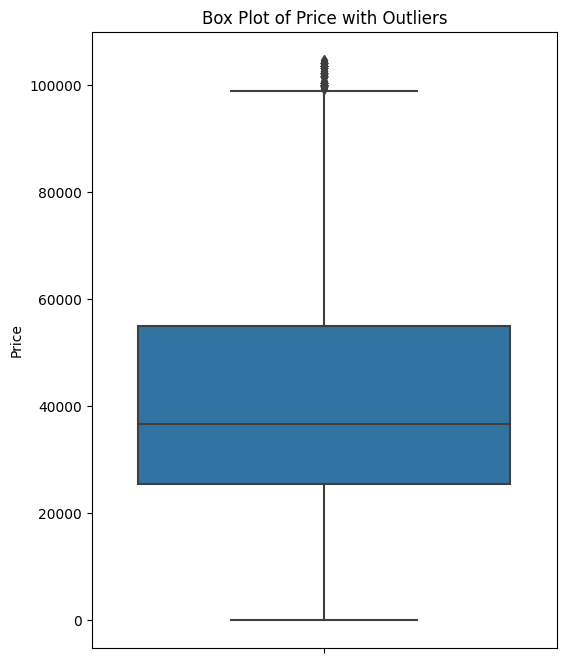

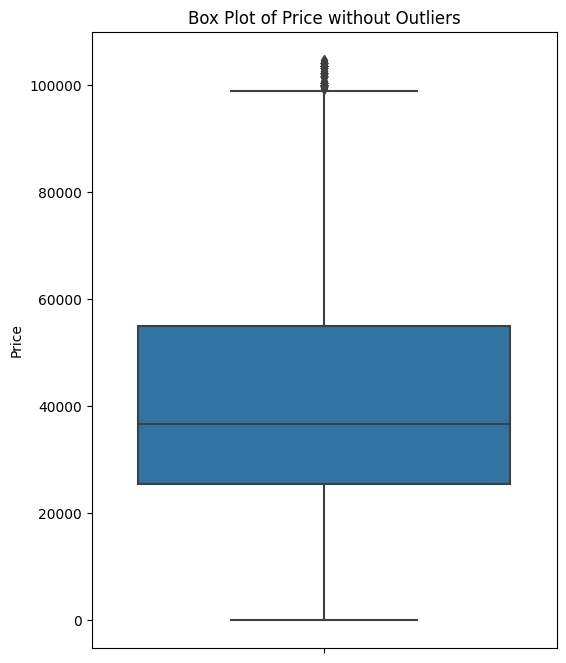

In [ ]:
prices = df_cars['price']

# Calculate the IQR (Interquartile Range)
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]

df_cars = df_cars[~((prices < lower_bound) | (prices > upper_bound))]

# Print information about outliers
print("Number of outliers:", len(outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Visualize the box plot with outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='price', data=df_cars)
plt.ylabel('Price')
plt.title('Box Plot of Price with Outliers')
plt.show()

# Remove outliers using the upper bound
data_no_outliers = df_cars[(df_cars['price'] >= lower_bound) & (df_cars['price'] <= upper_bound)]

# Visualize the box plot without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='price', data=data_no_outliers)
plt.ylabel('Price')
plt.title('Box Plot of Price without Outliers')
plt.show()

Outlier finding with box plot

Number of outliers: 352
Lower bound: -21381.625
Upper bound: 104697.375


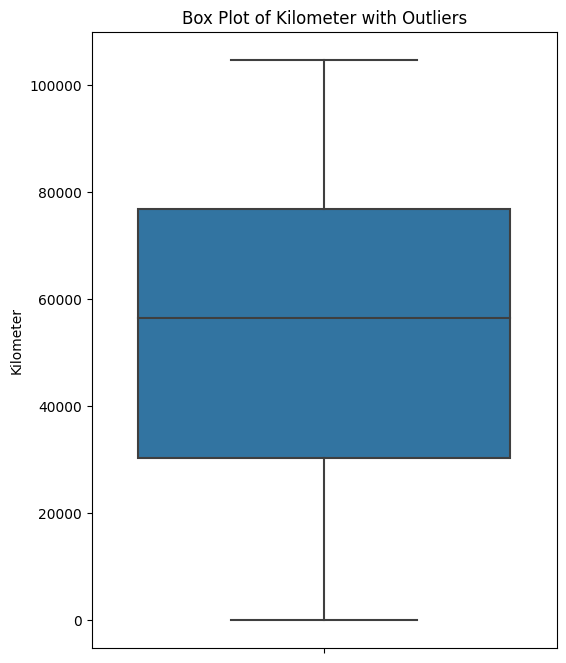

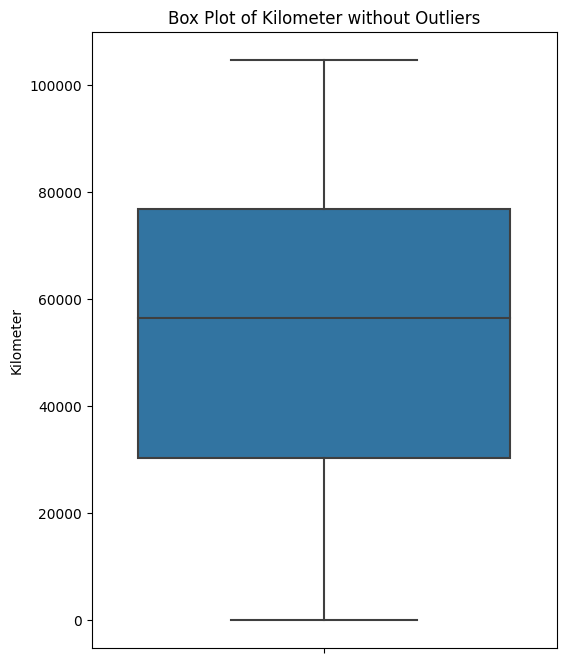

In [ ]:
kilometer = df_cars['kilometers']

# Calculate the IQR (Interquartile Range)
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]

# Print information about outliers
print("Number of outliers:", len(outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

df_cars = df_cars[~((kilometer < lower_bound) | (kilometer > upper_bound))]

# Visualize the box plot with outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='kilometers', data=df_cars)
plt.ylabel('Kilometer')
plt.title('Box Plot of Kilometer with Outliers')
plt.show()

# Remove outliers using the upper bound
data_no_outliers = df_cars[(df_cars['kilometers'] >= lower_bound) & (df_cars['kilometers'] <= upper_bound)]

# Visualize the box plot without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='kilometers', data=data_no_outliers)
plt.ylabel('Kilometer')
plt.title('Box Plot of Kilometer without Outliers')
plt.show()

In [ ]:
df_before_imputing = copy.deepcopy(df_cars)

Imputing km and price


In [ ]:
# def winsorize(series, lower_percentile, upper_percentile):
#     print(1)
#     lower_bound = np.percentile(series, lower_percentile)
#     upper_bound = np.percentile(series, upper_percentile)
#     return np.clip(series, lower_bound, upper_bound)

# df_cars['price'] = winsorize(df_cars['price'], 5, 95)
# df_cars['kilometers'] = winsorize(df_cars['kilometers'], 5, 95)

columns_to_impute = ['kilometers', 'price']
imputer = KNNImputer(n_neighbors=5)
df_cars[columns_to_impute] = imputer.fit_transform(df_cars[columns_to_impute])

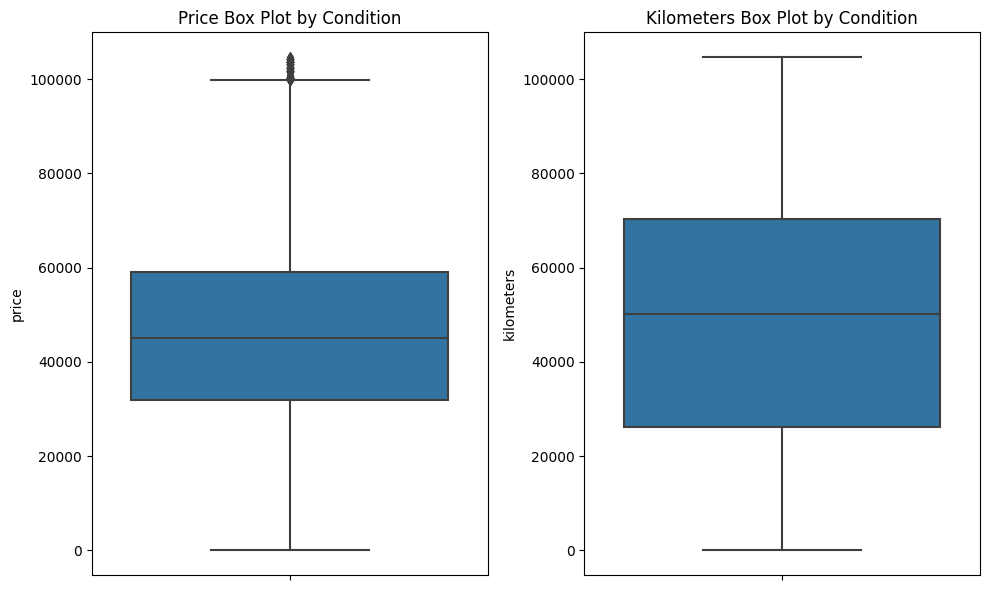

In [ ]:
# Create box plots using Seaborn
plt.figure(figsize=(10, 6))

# Price Box Plot
plt.subplot(1, 2, 1)
sns.boxplot( y="price", data=df_cars)
plt.title("Price Box Plot by Condition")

# Kilometers Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y="kilometers", data=df_cars)
plt.title("Kilometers Box Plot by Condition")

plt.tight_layout()
plt.show()

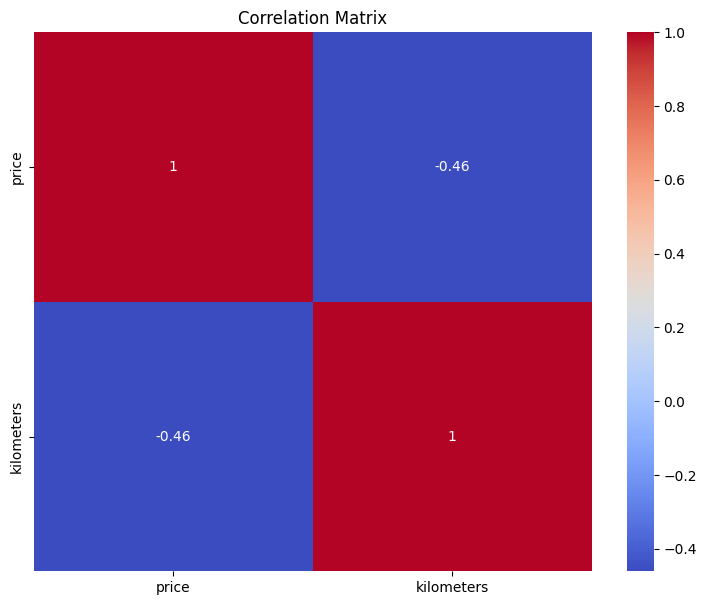

In [ ]:
numeric_cols = df_cars.select_dtypes(include=np.number).columns
corr_matrix = df_cars[numeric_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization

In [ ]:
pd.concat([df_cars.head(10),df_cars.tail(10)])

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.000000,Used,44.000000,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.000000,Used,80101.000000,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
3,43995.000000,Used,14115.000000,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.000000,Used,20795.000000,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
5,50587.000000,Used,98584.000000,2013,GMC,Sierra 3500,Grey,Pickup Truck,4 x 4,Automatic,Diesel,cowichan-valley-duncan
6,47195.422534,New,53838.646057,2023,Dodge,Charger,Blue,Sedan,Rear-wheel drive (RWD),Automatic,Gasoline,st-albert
8,74480.000000,New,46405.200000,2024,Chevrolet,Silverado 3500HD,White,Other,4 x 4,Automatic,Gasoline,edmonton
9,76162.000000,New,39466.200000,2023,Ram,1500,White,Pickup Truck,4 x 4,Automatic,Gasoline,edmonton
11,47195.422534,New,53838.646057,2024,Hyundai,Tucson,Grey,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,calgary
13,47469.000000,Used,26173.000000,2021,Jeep,Grand Cherokee,White,"SUV, Crossover",4 x 4,Automatic,Gasoline,edmonton


In [ ]:
fig = px.scatter(data_frame=df_cars, x='kilometers', y='price', color='condition', title='Scatter Plot: Kilometers vs Price')
fig.update_layout(width = 1200)
fig.show()

In [ ]:
fig = px.histogram(data_frame=df_cars, x='year', nbins=50, title='Histogram: Distribution of Years')
fig.show()

In [ ]:
pie_fig = px.pie(df_cars, names='fuel_type', title='Pie Chart: Fuel Type Distribution')
pie_fig.show()

In [ ]:
# Count the occurrences of each make
make_counts = df_cars['make'].value_counts().head(10)

# Create a bar plot
bar_fig = px.bar(x=make_counts.index, y=make_counts.values,
                 title='Top 10 Vehicle Makes', labels={'x': 'Make', 'y': 'Count'})

bar_fig.show()

In [ ]:
# Count the occurrences of each make
make_counts = df_cars['colour'].value_counts().head(10)

# Create a bar plot
bar_fig = px.bar(x=make_counts.index, y=make_counts.values,
                 title='Top 10 Vehicle Colors', labels={'x': 'Color', 'y': 'Count'})

bar_fig.show()

In [ ]:
df = df_cars.sort_values(by="year")
fig = px.scatter(df, x="year", y="price", color="fuel_type",
                 labels={"year": "Year", "price": "Price"}, hover_data=["make", "model"],
                 title="Price vs Year by Fuel Type")

fig.show()

In [ ]:
df = copy.deepcopy(df_cars)
df_cars

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,Used,44.0,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.0,Used,80101.0,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
3,43995.0,Used,14115.0,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.0,Used,20795.0,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
5,50587.0,Used,98584.0,2013,GMC,Sierra 3500,Grey,Pickup Truck,4 x 4,Automatic,Diesel,cowichan-valley-duncan
...,...,...,...,...,...,...,...,...,...,...,...,...
10708,30995.0,Used,67140.0,2020,Hyundai,Tucson,Silver,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,barrie
10711,37995.0,Used,46377.0,2021,Mazda,CX-5,Grey,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,barrie
10713,65929.0,Used,63000.0,2021,BMW,X5,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,longueuil-rive-sud
10715,40888.0,Used,44688.0,2017,Lexus,Other,Silver,Coupe (2 door),All-wheel drive (AWD),Automatic,Gasoline,calgary


#  Regression Model


In [ ]:
df_cars = copy.deepcopy(df)
df_cars

,price,condition,kilometers,year,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,Used,44.0,2023,Chrysler,Pacifica,White,"Minivan, Van",Front-wheel drive (FWD),Automatic,Hybrid-Electric,city-of-toronto
1,32995.0,Used,80101.0,2020,Nissan,Rogue,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,guelph
3,43995.0,Used,14115.0,2022,Honda,CR-V,Blue,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,hamilton
4,49335.0,Used,20795.0,2022,Ford,Explorer,Black,"SUV, Crossover",4 x 4,Automatic,Gasoline,windsor-area-on
5,50587.0,Used,98584.0,2013,GMC,Sierra 3500,Grey,Pickup Truck,4 x 4,Automatic,Diesel,cowichan-valley-duncan
...,...,...,...,...,...,...,...,...,...,...,...,...
10708,30995.0,Used,67140.0,2020,Hyundai,Tucson,Silver,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,barrie
10711,37995.0,Used,46377.0,2021,Mazda,CX-5,Grey,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,barrie
10713,65929.0,Used,63000.0,2021,BMW,X5,Black,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,longueuil-rive-sud
10715,40888.0,Used,44688.0,2017,Lexus,Other,Silver,Coupe (2 door),All-wheel drive (AWD),Automatic,Gasoline,calgary


First model runs with no or default parameters

In [ ]:
data =df_cars.drop("year", axis=1)
numerical =["price","kilometers"]
categorical = []

le = LabelEncoder()
for each in data.columns:
  if each not in numerical:
    categorical.append(each)
    data[each] = le.fit_transform(data[each])

# Calculate Pearson's correlation coefficient for numerical-numerical variables
corr_pearson = data.corr(method='pearson')
print('Pearson correlation coefficient:')
fig = px.imshow(corr_pearson)
fig.show()

# Calculate Spearman's rank correlation coefficient for ordinal-ordinal variables
corr_spearman, _ = spearmanr(data[categorical])
print('Spearman rank correlation coefficient:')
print(corr_spearman)
fig = px.imshow(corr_spearman)
fig.show()


# Calculate point-biserial correlation for numerical-categorical variables
pb_corr1, _ = pointbiserialr(data['price'], data['make'])
pb_corr2, _ = pointbiserialr(data['price'], data['model'])
pb_corr3, _ = pointbiserialr(data['price'], data['colour'])
pb_corr4, _ = pointbiserialr(data['price'], data['body_type'])
pb_corr5, _ = pointbiserialr(data['price'], data['drive_train'])
pb_corr6, _ = pointbiserialr(data['price'], data['fuel_type'])
print('Point-biserial correlation between price and make:', pb_corr1)
print('Point-biserial correlation between price and model:', pb_corr2)
print('Point-biserial correlation between price and colour:', pb_corr3)
print('Point-biserial correlation between price and body_type:', pb_corr4)
print('Point-biserial correlation between price and drive_train:', pb_corr5)
print('Point-biserial correlation between price and fuel_type:', pb_corr6)

# # Calculate Cramér's V for categorical-categorical variables
# contingency1 = pd.crosstab(data['make'], data['week_day'])
# contingency2 = pd.crosstab(data['make'], data['location'])
# contingency3 = pd.crosstab(data['make'], data['incident'])
# contingency4 = pd.crosstab(data['make'], data['vehicle'])
# chi21, _, _, _ = chi2_contingency(contingency1)
# chi22, _, _, _ = chi2_contingency(contingency2)
# chi23, _, _, _ = chi2_contingency(contingency3)
# chi24, _, _, _ = chi2_contingency(contingency4)
# cramers_v1 = np.sqrt(chi21 / (data.shape[0] * (min(contingency1.shape) - 1)))
# cramers_v2 = np.sqrt(chi22 / (data.shape[0] * (min(contingency2.shape) - 1)))
# cramers_v3 = np.sqrt(chi23 / (data.shape[0] * (min(contingency3.shape) - 1)))
# cramers_v4 = np.sqrt(chi24 / (data.shape[0] * (min(contingency4.shape) - 1)))
# print("Cramér's V between delay_type and week_day:", cramers_v1)
# print("Cramér's V between delay_type and location:", cramers_v2)
# print("Cramér's V between delay_type and incident:", cramers_v3)
# print("Cramér's V between delay_type and vehicle:", cramers_v4)

Pearson correlation coefficient:


Spearman rank correlation coefficient:
[[ 1.          0.03466455  0.05356162  0.03024935  0.2218903   0.11445932
  -0.02499848 -0.07825571  0.01291909]
 [ 0.03466455  1.         -0.20980865  0.01960683  0.00810358  0.00279431
   0.06542823  0.00986236 -0.05844867]
 [ 0.05356162 -0.20980865  1.          0.03216319 -0.04995988  0.08005666
   0.01781338  0.01468138  0.01207744]
 [ 0.03024935  0.01960683  0.03216319  1.         -0.01127963  0.08636229
   0.01976346  0.02670296 -0.03295145]
 [ 0.2218903   0.00810358 -0.04995988 -0.01127963  1.          0.1557792
  -0.11126818 -0.05830438  0.03132727]
 [ 0.11445932  0.00279431  0.08005666  0.08636229  0.1557792   1.
   0.21401866  0.10966715  0.0081772 ]
 [-0.02499848  0.06542823  0.01781338  0.01976346 -0.11126818  0.21401866
   1.          0.16747761  0.02211688]
 [-0.07825571  0.00986236  0.01468138  0.02670296 -0.05830438  0.10966715
   0.16747761  1.          0.05821345]
 [ 0.01291909 -0.05844867  0.01207744 -0.03295145  0.03132727  0.0

Point-biserial correlation between price and make: -0.07802741597382534
Point-biserial correlation between price and model: -0.06799526134999354
Point-biserial correlation between price and colour: -0.06780041189134803
Point-biserial correlation between price and body_type: -0.14988992418885563
Point-biserial correlation between price and drive_train: -0.31431053804096126
Point-biserial correlation between price and fuel_type: 0.017154532801511045


In [ ]:
X = data.drop(columns=['price'])
y = data['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the models
svr_model = SVR()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Fit the models
svr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
svr_pred = svr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate metrics
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)  # Calculate RMSE
svr_r2 = r2_score(y_test, svr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)  # Calculate RMSE
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)  # Calculate RMSE
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Model': ['SVR', 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [svr_mse, rf_mse, gb_mse],
    'Mean Absolute Error': [svr_mae, rf_mae, gb_mae],
    'Root Mean Squared Error': [svr_rmse, rf_rmse, gb_rmse],
    'R-squared': [svr_r2, rf_r2, gb_r2]
})

# Create bar plots for metrics
mse_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Mean Squared Error'], y=[svr_mse]),
    go.Bar(name='Random Forest', x=['Mean Squared Error'], y=[rf_mse]),
    go.Bar(name='Gradient Boosting', x=['Mean Squared Error'], y=[gb_mse])
])
mse_bar.update_layout(title='Mean Squared Error Comparison')

mae_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Mean Absolute Error'], y=[svr_mae]),
    go.Bar(name='Random Forest', x=['Mean Absolute Error'], y=[rf_mae]),
    go.Bar(name='Gradient Boosting', x=['Mean Absolute Error'], y=[gb_mae])
])
mae_bar.update_layout(title='Mean Absolute Error Comparison')

rmse_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Root Mean Squared Error'], y=[svr_rmse]),
    go.Bar(name='Random Forest', x=['Root Mean Squared Error'], y=[rf_rmse]),
    go.Bar(name='Gradient Boosting', x=['Root Mean Squared Error'], y=[gb_rmse])
])
rmse_bar.update_layout(title='Root Mean Squared Error Comparison')

r2_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['R-squared'], y=[svr_r2]),
    go.Bar(name='Random Forest', x=['R-squared'], y=[rf_r2]),
    go.Bar(name='Gradient Boosting', x=['R-squared'], y=[gb_r2])
])
r2_bar.update_layout(title='R-squared Comparison')

# Display the plots
mse_bar.show()
mae_bar.show()
rmse_bar.show()
r2_bar.show()

# Display the metrics DataFrame
metrics_df

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
0,SVR,3.689666e+08,15307.680044,19208.503651,0.016144
1,Random Forest,4.147970e+07,2760.721123,6440.473655,0.889394
2,Gradient Boosting,1.102343e+08,7525.538955,10499.252343,0.706058


## Optimize

In [ ]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist_rf,
                                       cv=3, scoring='neg_mean_squared_error',verbose=10)
random_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf = random_search_rf.best_estimator_
best_rf

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/3; 1/10] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-147169067.253 total time=   0.6s
[CV 2/3; 1/10] START max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/3; 1/10] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-129558538.794 total time=   0.6s
[CV 3/3; 1/10] START max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/3; 1/10] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-139736257.954 total time=   0.6s
[CV 1/3; 2/10] START max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=200
[CV 1/3; 2/10] END max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 2/10] START max_depth=10, min_samples_leaf=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomForestRegressor(max_depth=20, n_estimators=200)

In [ ]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1,1,2],
    'n_estimators': [100, 200, 300,400,500,600],
    'max_depth': [4, 5,6,8],
    'subsample': [0.7,0.8, 0.9, 1.0]
}

# Perform grid search
grid_gb = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_grid_gb,
                       cv=3, scoring='neg_mean_squared_error',verbose=10)
grid_gb.fit(X_train, y_train)

# Get the best Gradient Boosting model
best_gb = grid_gb.best_estimator_
best_gb

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0
[CV 1/3; 1/10] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0;, score=-49612483.268 total time=   2.7s
[CV 2/3; 1/10] START learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0
[CV 2/3; 1/10] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0;, score=-49942080.237 total time=   2.4s
[CV 3/3; 1/10] START learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0
[CV 3/3; 1/10] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1.0;, score=-52084550.013 total time=   2.7s
[CV 1/3; 2/10] START learning_rate=2, max_depth=4, n_estimators=300, subsample=0.9
[CV 1/3; 2/10] END learning_rate=2, max_depth=4, n_estimators=300, subsample=0.9;, score=-25852810120197.527 total time=   3.0s
[CV 2/3; 2/10] START learning_rate=2, max_depth=4, n_estimators=300, subsample=0.9
[CV 2/3; 2/10] END

GradientBoostingRegressor(max_depth=8, n_estimators=500, subsample=0.8)

## After Hyper tuning


In [ ]:
# Initialize the models
# svr_model = SVR()
rf_model = RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=300)
gb_model = GradientBoostingRegressor(max_depth=8, n_estimators=200, subsample=0.7)

# Fit the models
# svr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
# svr_pred = svr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate metrics
# svr_mse = mean_squared_error(y_test, svr_pred)
# svr_mae = mean_absolute_error(y_test, svr_pred)
# svr_rmse = np.sqrt(svr_mse)
# svr_r2 = r2_score(y_test, svr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
metrics_df = pd.DataFrame({
    'Model': [ 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [ rf_mse, gb_mse], #
    'Mean Absolute Error': [ rf_mae, gb_mae], #
    'R-squared': [ rf_r2, gb_r2],
    'RMSE':[rf_rmse,gb_rmse]#
})

mse_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Mean Squared Error'], y=[svr_mse]),
    go.Bar(name='Random Forest', x=['Mean Squared Error'], y=[rf_mse]),
    go.Bar(name='Gradient Boosting', x=['Mean Squared Error'], y=[gb_mse])
])
mse_bar.update_layout(title='Mean Squared Error Comparison')

# Create bar chart for Mean Absolute Error
mae_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Mean Absolute Error'], y=[svr_mae]),
    go.Bar(name='Random Forest', x=['Mean Absolute Error'], y=[rf_mae]),
    go.Bar(name='Gradient Boosting', x=['Mean Absolute Error'], y=[gb_mae])
])
mae_bar.update_layout(title='Mean Absolute Error Comparison')

rmse_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Root Mean Squared Error'], y=[svr_rmse]),
    go.Bar(name='Random Forest', x=['Root Mean Squared Error'], y=[rf_rmse]),
    go.Bar(name='Gradient Boosting', x=['Root Mean Squared" Error'], y=[gb_rmse])
])
rmse_bar.update_layout(title='Root Mean Squared Error Comparison')

# Create bar chart for R-squared
r2_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['R-squared'], y=[svr_r2]),
    go.Bar(name='Random Forest', x=['R-squared'], y=[rf_r2]),
    go.Bar(name='Gradient Boosting', x=['R-squared'], y=[gb_r2])
])
r2_bar.update_layout(title='R-squared Comparison')

mse_bar.show()
mae_bar.show()
r2_bar.show()
rmse_bar.show()

metrics_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared,RMSE
0,Random Forest,4.264874e+07,2879.873410,0.886276,6530.600468
1,Gradient Boosting,3.239277e+07,2550.833355,0.913624,5691.464955


In [ ]:
 from sklearn.model_selection import learning_curve

In [ ]:
def plot_learning_curve_plotly(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    trace1 = go.Scatter(x=train_sizes, y=train_scores_mean, mode='lines+markers', name='Training error', line=dict(color='red'))
    trace2 = go.Scatter(x=train_sizes, y=test_scores_mean, mode='lines+markers', name='Cross-validation error', line=dict(color='green'))

    layout = go.Layout(
        title=title,
        xaxis=dict(title='Training examples'),
        yaxis=dict(title='Negative Mean Squared Error'),
        legend=dict(x=0, y=1)
    )

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()

# Plot learning curves for each model using Plotly
plot_learning_curve_plotly(svr_model, X_train, y_train, title="SVR Learning Curve")
plot_learning_curve_plotly(rf_model, X_train, y_train, title="Random Forest Learning Curve")
plot_learning_curve_plotly(gb_model, X_train, y_train, title="Gradient Boosting Learning Curve")

For SVR the trainig data overtime has a increase in MSE which may

In [ ]:
# Create a DataFrame to hold the test data, actual values, and predicted values
test_results = pd.DataFrame({'Actual': y_test, 'SVR_Predicted': svr_pred, 'RF_Predicted': rf_pred, 'GB_Predicted': gb_pred})

# Scatter plot with regression line using Plotly Express
def create_regression_scatter_plot(model_name):
    fig = px.scatter(test_results, x='Actual', y=f'{model_name}_Predicted', title=f'{model_name} - Actual vs Predicted')
    fig.update_traces(marker=dict(size=8, opacity=0.8), selector=dict(mode='markers'))
    fig.update_layout(
        xaxis_title='Actual Target Values',
        yaxis_title='Predicted Target Values',
        showlegend=True
    )
    fig.show()

create_regression_scatter_plot('SVR')
create_regression_scatter_plot('RF')
create_regression_scatter_plot('GB')

The learning curves show how the training and cross-validation errors change with increasing training dataset size. If the training and cross-validation errors are converging as the dataset size increases, it suggests that the model is not overfitting. If the training error is much lower than the cross-validation error, it indicates overfitting.

# Using the model to predict missing values in Regression

In [ ]:
df_cars = copy.deepcopy(df_before_imputing)

In [ ]:
columns_to_impute = ['kilometers']
imputer = KNNImputer(n_neighbors=5)
df_cars[columns_to_impute] = imputer.fit_transform(df_cars[columns_to_impute])


In [ ]:
data =df_cars.drop("year", axis=1)
numerical =["price","kilometers"]
categorical = []

le = LabelEncoder()
for each in data.columns:
  if each not in numerical:
    categorical.append(each)
    data[each] = le.fit_transform(data[each])

X = data.drop(columns=['price'])
y = data['price']



In [ ]:
predicted_prices = rf_model.predict(X)
# Impute the predicted prices into the original DataFrame where 'price' is NaN
data.loc[df_cars['price'].isnull(), 'price'] = predicted_prices[data['price'].isnull()]
data

,price,condition,kilometers,make,model,colour,body_type,drive_train,transmission,fuel_type,city
0,64888.0,5,44.0,8,183,13,3,2,3,3,18
1,32995.0,5,80101.0,29,222,1,6,1,3,2,36
3,43995.0,5,14115.0,14,48,2,6,1,3,2,37
4,49335.0,5,20795.0,11,92,1,6,0,3,2,107
5,50587.0,5,98584.0,12,245,7,5,0,3,0,21
...,...,...,...,...,...,...,...,...,...,...,...
10708,30995.0,5,67140.0,15,279,12,6,1,3,2,3
10711,37995.0,5,46377.0,25,52,7,6,1,3,2,3
10713,65929.0,5,63000.0,3,296,1,6,1,3,2,54
10715,40888.0,5,44688.0,21,179,12,1,1,3,2,11


In [ ]:
X = data.drop(columns=['price'])
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.isnull().sum()

price           0
condition       0
kilometers      0
make            0
model           0
colour          0
body_type       0
drive_train     0
transmission    0
fuel_type       0
city            0
dtype: int64

In [ ]:
# Initialize the models
svr_model = SVR()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Fit the models
svr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
svr_pred = svr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate metrics
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)  # Calculate RMSE
svr_r2 = r2_score(y_test, svr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)  # Calculate RMSE
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)  # Calculate RMSE
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Model': ['SVR', 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [svr_mse, rf_mse, gb_mse],
    'Mean Absolute Error': [svr_mae, rf_mae, gb_mae],
    'Root Mean Squared Error': [svr_rmse, rf_rmse, gb_rmse],
    'R-squared': [svr_r2, rf_r2, gb_r2]
})

# Create bar plots for metrics
mse_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Mean Squared Error'], y=[svr_mse]),
    go.Bar(name='Random Forest', x=['Mean Squared Error'], y=[rf_mse]),
    go.Bar(name='Gradient Boosting', x=['Mean Squared Error'], y=[gb_mse])
])
mse_bar.update_layout(title='Mean Squared Error Comparison')

mae_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Mean Absolute Error'], y=[svr_mae]),
    go.Bar(name='Random Forest', x=['Mean Absolute Error'], y=[rf_mae]),
    go.Bar(name='Gradient Boosting', x=['Mean Absolute Error'], y=[gb_mae])
])
mae_bar.update_layout(title='Mean Absolute Error Comparison')

rmse_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['Root Mean Squared Error'], y=[svr_rmse]),
    go.Bar(name='Random Forest', x=['Root Mean Squared Error'], y=[rf_rmse]),
    go.Bar(name='Gradient Boosting', x=['Root Mean Squared Error'], y=[gb_rmse])
])
rmse_bar.update_layout(title='Root Mean Squared Error Comparison')

r2_bar = go.Figure(data=[
    go.Bar(name='SVR', x=['R-squared'], y=[svr_r2]),
    go.Bar(name='Random Forest', x=['R-squared'], y=[rf_r2]),
    go.Bar(name='Gradient Boosting', x=['R-squared'], y=[gb_r2])
])
r2_bar.update_layout(title='R-squared Comparison')

# Display the plots
mse_bar.show()
mae_bar.show()
rmse_bar.show()
r2_bar.show()

# Display the metrics DataFrame
metrics_df

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
0,SVR,3.730768e+08,15411.207196,19315.196564,0.001968
1,Random Forest,3.860458e+07,2711.530910,6213.258713,0.896727
2,Gradient Boosting,1.148717e+08,7590.409004,10717.821915,0.692702


In [ ]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist_rf,
                                       cv=3, scoring='neg_mean_squared_error',verbose=10)
random_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf = random_search_rf.best_estimator_
best_rf

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 1/3; 1/10] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-52424796.179 total time=   2.9s
[CV 2/3; 1/10] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 2/3; 1/10] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-45304314.977 total time=   3.1s
[CV 3/3; 1/10] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 3/3; 1/10] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-46794329.655 total time=   3.2s
[CV 1/3; 2/10] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/3; 2/10] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-83280224.201 total time=   0.7s
[CV 2/3; 2/10] START max_depth=10, mi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomForestRegressor(max_depth=30, n_estimators=300)

In [ ]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1,1,2],
    'n_estimators': [100, 200, 300,400,500,600],
    'max_depth': [4, 5,6,8],
    'subsample': [0.7,0.8, 0.9, 1.0]
}

# Perform grid search
grid_gb = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_grid_gb,
                       cv=3, scoring='neg_mean_squared_error',verbose=10)
grid_gb.fit(X_train, y_train)

# Get the best Gradient Boosting model
best_gb = grid_gb.best_estimator_
best_gb

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0
[CV 1/3; 1/10] END learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-47985385.531 total time=   2.0s
[CV 2/3; 1/10] START learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0
[CV 2/3; 1/10] END learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-40386989.286 total time=   1.7s
[CV 3/3; 1/10] START learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0
[CV 3/3; 1/10] END learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-42935565.860 total time=   1.7s
[CV 1/3; 2/10] START learning_rate=1, max_depth=8, n_estimators=200, subsample=0.7
[CV 1/3; 2/10] END learning_rate=1, max_depth=8, n_estimators=200, subsample=0.7;, score=-122430523.121 total time=   1.3s
[CV 2/3; 2/10] START learning_rate=1, max_depth=8, n_estimators=200, subsample=0.7
[CV 2/3; 2/10] END lear

GradientBoostingRegressor(max_depth=8, n_estimators=600, subsample=0.7)

In [ ]:
# Initialize the models
# svr_model = SVR()
rf_model = RandomForestRegressor(max_depth=30)
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=300, subsample=0.7)

# Fit the models
# svr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
# svr_pred = svr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate metrics
# svr_mse = mean_squared_error(y_test, svr_pred)
# svr_mae = mean_absolute_error(y_test, svr_pred)
# svr_rmse = np.sqrt(svr_mse)
# svr_r2 = r2_score(y_test, svr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
metrics_df = pd.DataFrame({
    'Model': [ 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [ rf_mse, gb_mse], #
    'Mean Absolute Error': [ rf_mae, gb_mae], #
    'R-squared': [ rf_r2, gb_r2],
    'RMSE':[rf_rmse,gb_rmse]#
})

mse_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Mean Squared Error'], y=[svr_mse]),
    go.Bar(name='Random Forest', x=['Mean Squared Error'], y=[rf_mse]),
    go.Bar(name='Gradient Boosting', x=['Mean Squared Error'], y=[gb_mse])
])
mse_bar.update_layout(title='Mean Squared Error Comparison')

# Create bar chart for Mean Absolute Error
mae_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Mean Absolute Error'], y=[svr_mae]),
    go.Bar(name='Random Forest', x=['Mean Absolute Error'], y=[rf_mae]),
    go.Bar(name='Gradient Boosting', x=['Mean Absolute Error'], y=[gb_mae])
])
mae_bar.update_layout(title='Mean Absolute Error Comparison')

rmse_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['Root Mean Squared Error'], y=[svr_rmse]),
    go.Bar(name='Random Forest', x=['Root Mean Squared Error'], y=[rf_rmse]),
    go.Bar(name='Gradient Boosting', x=['Root Mean Squared" Error'], y=[gb_rmse])
])
rmse_bar.update_layout(title='Root Mean Squared Error Comparison')

# Create bar chart for R-squared
r2_bar = go.Figure(data=[
    # go.Bar(name='SVR', x=['R-squared'], y=[svr_r2]),
    go.Bar(name='Random Forest', x=['R-squared'], y=[rf_r2]),
    go.Bar(name='Gradient Boosting', x=['R-squared'], y=[gb_r2])
])
r2_bar.update_layout(title='R-squared Comparison')

mse_bar.show()
mae_bar.show()
r2_bar.show()
rmse_bar.show()

metrics_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared,RMSE
0,Random Forest,3.837165e+07,2714.722063,0.897350,6194.485420
1,Gradient Boosting,4.095170e+07,3995.941220,0.890448,6399.351728


In [ ]:
def plot_learning_curve_plotly(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    trace1 = go.Scatter(x=train_sizes, y=train_scores_mean, mode='lines+markers', name='Training error', line=dict(color='red'))
    trace2 = go.Scatter(x=train_sizes, y=test_scores_mean, mode='lines+markers', name='Cross-validation error', line=dict(color='green'))

    layout = go.Layout(
        title=title,
        xaxis=dict(title='Training examples'),
        yaxis=dict(title='Negative Mean Squared Error'),
        legend=dict(x=0, y=1)
    )

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()

# Plot learning curves for each model using Plotly
plot_learning_curve_plotly(svr_model, X_train, y_train, title="SVR Learning Curve")
plot_learning_curve_plotly(rf_model, X_train, y_train, title="Random Forest Learning Curve")
plot_learning_curve_plotly(gb_model, X_train, y_train, title="Gradient Boosting Learning Curve")

In [ ]:
# Create a DataFrame to hold the test data, actual values, and predicted values
test_results = pd.DataFrame({'Actual': y_test, 'SVR_Predicted': svr_pred, 'RF_Predicted': rf_pred, 'GB_Predicted': gb_pred})

# Scatter plot with regression line using Plotly Express
def create_regression_scatter_plot(model_name):
    fig = px.scatter(test_results, x='Actual', y=f'{model_name}_Predicted', title=f'{model_name} - Actual vs Predicted')
    fig.update_traces(marker=dict(size=8, opacity=0.8), selector=dict(mode='markers'))
    fig.update_layout(
        xaxis_title='Actual Target Values',
        yaxis_title='Predicted Target Values',
        showlegend=True
    )
    fig.show()

create_regression_scatter_plot('SVR')
create_regression_scatter_plot('RF')
create_regression_scatter_plot('GB')